In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


extracted_data = r"D:\Documents\datasets\AIST4010\muse\extracted_data.csv"
statistics = pd.read_csv(extracted_data)
statistics.head()

,spotify_id,lastfm_url,track,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,genre
0,000xQL6tZNLJzIrtIgxqSl,https://www.last.fm/music/zayn/_/still%2bgot%2...,Still Got Time (feat. PARTYNEXTDOOR) - Zayn,['exotic'],1,7.550000,6.900000,5.650000,NaN,pop
1,0024tEymsoc9FyKUauQngQ,https://www.last.fm/music/vangelis/_/to%2bthe%...,To the Unknown Man - Vangelis,['meditative'],6,3.814545,2.510909,3.267273,6cc1e1ac-8ddf-440e-afac-6a34dde85bcc,new age
2,003T0xMD76OIHf6prmx8NP,https://www.last.fm/music/xiu%2bxiu/_/clowne%2...,Clowne Towne - Xiu Xiu,"['intense', 'earnest', 'rousing']",7,7.061165,5.473107,6.546505,27c052fa-7296-4ae3-92af-dcc175ff4669,experimental
3,0049onRo1h5U4gy8RuYMGK,https://www.last.fm/music/deepsky/_/view%2bfro...,View From a Stairway - Deepsky,['euphoric'],4,6.704000,4.840000,5.248000,ec82097d-4c63-4df4-ae9d-6c8ebd08a84d,progressive breaks
4,004VU4cWTkRqVMrlv8KW3D,https://www.last.fm/music/the%2bhush%2bsound/_...,Magnolia - The Hush Sound,['introspective'],5,6.200965,3.320351,5.992807,bb5352fa-8bff-4551-a0be-081f71254714,indie


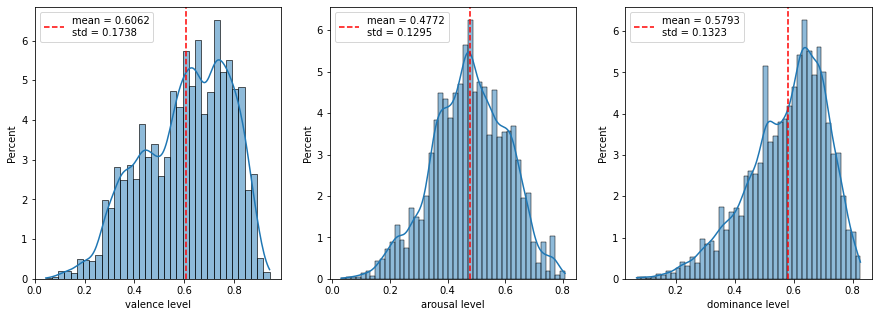

In [47]:
# get the valence, arousal, dominance in 0-1 point scale
valence = statistics.valence_tags / 9
arousal = statistics.arousal_tags / 9
dominance = statistics.dominance_tags / 9

# plot the boxplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for idx, data in enumerate([valence, arousal, dominance]):
    sns.histplot(data=data, kde=True, stat="percent", ax=axs[idx])
    mu, std = data.mean(), data.std()
    axs[idx].axvline(x = mu, color='r', ls='--', 
                     label=f"mean = {mu:.4f}\nstd = {std:.4f}")
    axs[idx].legend()
axs[0].set_xlabel('valence level')
axs[1].set_xlabel('arousal level')
axs[2].set_xlabel('dominance level')
plt.show()

In [42]:
genre_dict = {'others': 0}
for genre, item_cnt in statistics.genre.value_counts().items():
    genre_dict[genre] = item_cnt
top15_genres = sorted(genre_dict, key=genre_dict.get, reverse=True)[:15]
top15_genre_dict = {genre: genre_dict[genre] for genre in top15_genres}
top15_genre_df = pd.DataFrame.from_dict(top15_genre_dict, 
                                        orient='index', columns=['count'])

In [44]:
top15_genre_df

,count
indie,760
rock,701
electronic,648
pop,546
folk,333
ambient,324
alternative,234
hip-hop,194
soundtrack,189
soul,170
